# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
data_path = "../../data/"

# Data

In [3]:
df_radiomics = pd.read_excel(data_path + "quantitative_radiomic_features.xls")
df_radiomics['Lesion Name'] = df_radiomics['Lesion Name'].str.replace(r'-1\.les|-S2-1\.les', '', regex=True)

In [4]:
df_multigenic = pd.read_excel(data_path + "multigenic_assays.xlsx") 

C:\Users\Jose\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
df_clinical = pd.read_excel(data_path + "clinical_data.xls")

# Target Class

In [6]:
import re
import os

valid_rows = []
not_valid_count = 0 

for index, row in df_multigenic.iterrows():
    clid = row['CLID']
    
    in_radiomics = clid in df_radiomics['Lesion Name'].values
    in_clinical = clid in df_clinical['bcr_patient_barcode'].values
    
    if in_radiomics and in_clinical:
        valid_rows.append(row)
    else:
        not_valid_count += 1

valid_df = pd.DataFrame(valid_rows)

In [7]:
print(f"Número total de filas iniciales: {len(df_multigenic)}")
print(f"Número total de filas válidas: {len(valid_df)}")
print(f"Número total de filas no válidas: {not_valid_count}")

Número total de filas iniciales: 100
Número total de filas válidas: 80
Número total de filas no válidas: 20


In [8]:
target_class = valid_df[valid_df['Pam50.Call'] != 'Normal'].iloc[:, :2]
value_counts = target_class['Pam50.Call'].value_counts()
print(f"Número total de filas final: {sum(value_counts)}")
print(value_counts)

Número total de filas final: 76
Pam50.Call
LumA     52
LumB     10
Basal     9
Her2      5
Name: count, dtype: int64


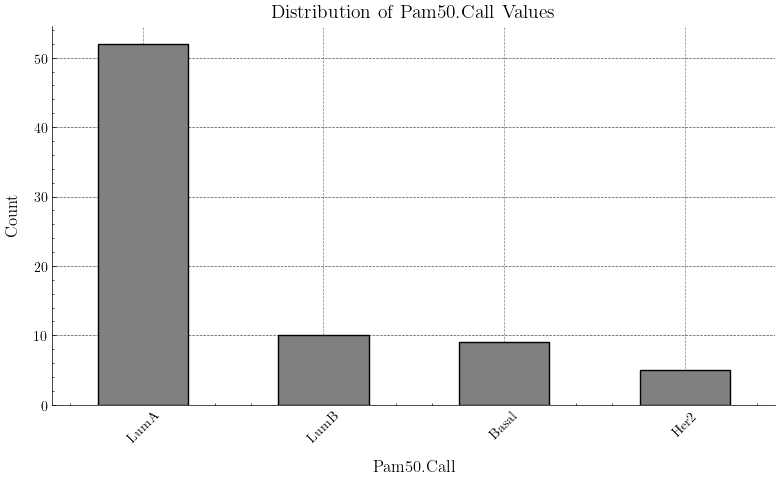

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import scienceplots

plt.style.use(['science', 'grid'])

isup_counts = target_class['Pam50.Call'].value_counts()

fig, ax = plt.subplots(figsize=(8, 5))  # Ajustamos el tamaño según se indicó
isup_counts.plot(kind='bar', color='gray', edgecolor='black', ax=ax)

# Título y etiquetas traducidos al inglés
ax.set_title('Distribution of Pam50.Call Values', fontsize=14)
ax.set_xlabel('Pam50.Call', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)

# Rotación de los labels y ajustes de los ticks
ax.set_xticks(range(len(isup_counts)))
ax.set_xticklabels(isup_counts.index, rotation=45, fontsize=10)  # Etiquetas con rotación 45°
ax.tick_params(axis='y', labelsize=10)

# Grid en el eje Y y estilo del gráfico
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(top=False, right=False, which='both')

fig.tight_layout()
plt.savefig('distribution_pam50_call.png', dpi=300, bbox_inches='tight')  # Línea opcional para guardar el plot
plt.show()

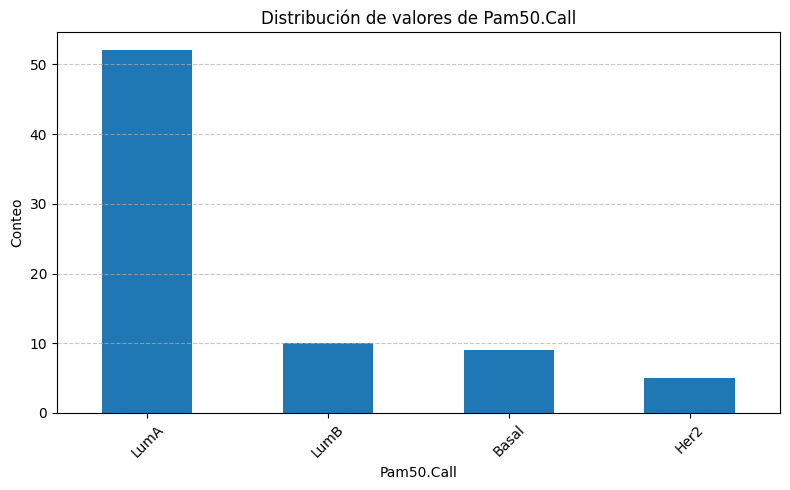

In [10]:
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar')
plt.title('Distribución de valores de Pam50.Call')
plt.xlabel('Pam50.Call')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save target class

In [66]:
target_class.to_csv(data_path + "target_class.csv", index = False)